In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import numpy as np
import torch
import pandas as pd
import os
import pickle
from copy import deepcopy


from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from scipy.stats import randint
from scipy.stats import uniform
from scipy.stats import loguniform


import optuna
optuna.logging.set_verbosity(0) 


import warnings
warnings.filterwarnings('ignore')

import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
#plt.style.use('classic')



import npm_nnf.utils.utils_kernels as KT 
import npm_nnf.density_estimation.utils_density as utils
import npm_nnf.density_estimation.utils_data_generator as generators
import npm_nnf.utils.utils_train as utils_train

In [29]:
a = np.array([1,2,np.nan,np.nan])

In [30]:
a.mean()

nan

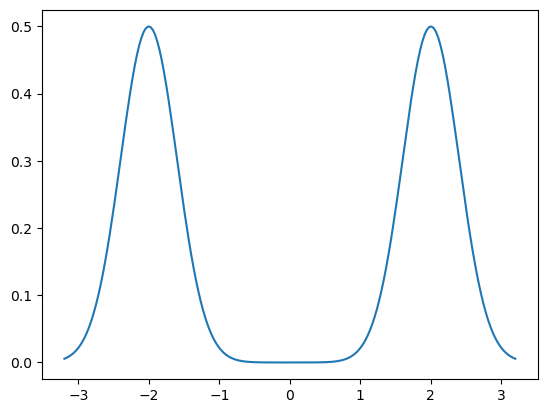

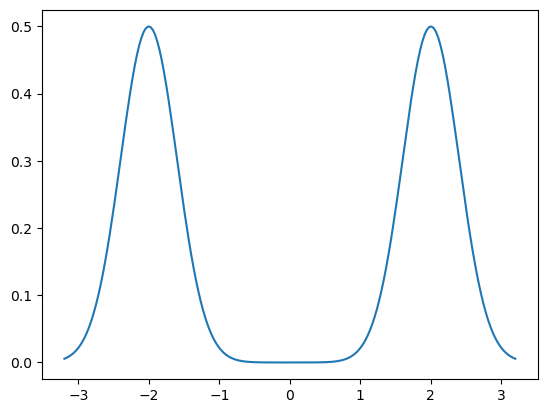

In [17]:
# Number of data points we will be using and basic parameters of the model



d = 10
#def gen(n = ndata):
#    ds,_ = generators.generateGaussianD(torch.zeros(d),1/np.sqrt(d),n,d)
#    return ds

r_data = 2
sigma_data = np.sqrt(1/(2*np.pi))
def gen(ndata):
    ds,_ = generators.generate2GaussianD(r_data,sigma_data,ndata,d)
    #ds,_ = generators.generate3GaussianD(r_data,sigma_data,0.2*sigma_data,ndata,d)
    return ds

_,density_data=generators.generate2GaussianD(r_data,sigma_data,1,d)
#_,density_data=generators.generate3GaussianD(r_data,sigma_data,0.2*sigma_data,1,d)


base = 'gaussian'
mu_base,eta_base = torch.zeros((d,)),5

ndata = 1000
data_set = gen(ndata)






    
    

In [4]:
save_path = f'models/density_estimation_{d}d_ndata_{ndata}'

In [5]:
def gentest(ntest,ctest,radtest,frac = 0.5):
    ds = torch.zeros((ntest,d))
    ntestrand = int(frac*ntest)
    ntestnear = ntest - ntestrand
    ds[:ntestrand,:] = ctest + radtest*(2*torch.rand(ntestrand,d) - 1)
    ds[ntestrand:,:],_ = generators.generate2GaussianD(r_data,sigma_data,ntestnear,d)
    #ds[ntestrand:,:],_ = generators.generate3GaussianD(r_data,sigma_data,0.2*sigma_data,ntestnear,d)
    return ds

# Linear model

In [4]:
version = find_last_version(path = 'models/lin_model_1D',extension = 'pickle')

print(f'last model version number : {version}')

last model version number : 1


In [5]:
parameters = {'sigma' : [1], 'la' : np.logspace(-8,0,20),'Niter' : ['auto'] , 'eta_base' : [eta_base], 'mu_base' : [mu_base]}
X = data_set
model = utils.LinearEstimator()
clf = GridSearchCV(model, parameters)
clf.fit(X)
clf_info = {'cross_valid' : clf.cv_results_,'data_set' : data_set}
version = 1
filename = f'models/lin_model_1D_{version}.pickle'
pickle.dump(clf_info, open(filename, 'wb'))

sigma = 1, lambda = 1e-08
sigma = 1, lambda = 1e-08
sigma = 1, lambda = 1e-08
sigma = 1, lambda = 1e-08
sigma = 1, lambda = 1e-08
sigma = 1, lambda = 2.6366508987303555e-08
sigma = 1, lambda = 2.6366508987303555e-08
sigma = 1, lambda = 2.6366508987303555e-08
sigma = 1, lambda = 2.6366508987303555e-08
sigma = 1, lambda = 2.6366508987303555e-08
sigma = 1, lambda = 6.951927961775605e-08
sigma = 1, lambda = 6.951927961775605e-08
sigma = 1, lambda = 6.951927961775605e-08
sigma = 1, lambda = 6.951927961775605e-08
sigma = 1, lambda = 6.951927961775605e-08
sigma = 1, lambda = 1.8329807108324375e-07
sigma = 1, lambda = 1.8329807108324375e-07
sigma = 1, lambda = 1.8329807108324375e-07
sigma = 1, lambda = 1.8329807108324375e-07
sigma = 1, lambda = 1.8329807108324375e-07
sigma = 1, lambda = 4.832930238571752e-07
sigma = 1, lambda = 4.832930238571752e-07
sigma = 1, lambda = 4.832930238571752e-07
sigma = 1, lambda = 4.832930238571752e-07
sigma = 1, lambda = 4.832930238571752e-07
sigma = 1, lambda = 

/opt/miniconda3/envs/p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/envs/p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 529, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/Users/ulyssemarteau/Desktop/NIPS/Experiments/npm_nnf/npm_nnf/density_estimation/utils_density.py", line 465, in fit
    al = self.dModel.prox_method(self.Niter, cb=cb, cobj=cobj)
  File "/Users/ulyssemarteau/Desktop/NIPS/Experiments/npm_nnf/npm_nnf/density_estimation/utils_density.py", line 952, in prox_method
    Oval,Ograd,Gl_dual = Oms_dual(al2)
  File "/Users/ulyssemarteau/Desktop/NIPS/Experiments/npm_nnf/npm_nnf/density_estimation/utils_density.py", line 929, in Oms_dual
    x = minus_l(self.lmodel.Rt(alpha))
  File "/Users/ulyssemarteau/Desktop/N

AttributeError: 'LMK2' object has no attribute 'constraint'

{'Niter': 'auto', 'eta_base': 5, 'la': 1e-08, 'mu_base': tensor([0.]), 'sigma': 1}
sigma = 1, lambda = 1e-08
---iteration: 1---
Finished after 30 iterations
Integral tracker values : 30,0


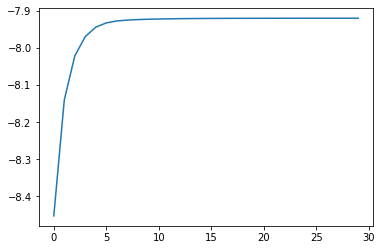

In [12]:
version = 1
filename = f'models/lin_model_1D_{version}.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
df = pd.DataFrame(loaded_model['cross_valid'])
data_set = loaded_model['data_set']
params_best = df[df['rank_test_score'] == 1].iloc[0]['params']
print(params_best)
model = utils.LinearEstimator(**params_best)
model.fit(data_set)

integral = tensor([[0.8908]])
integral = tensor([[0.8908]])


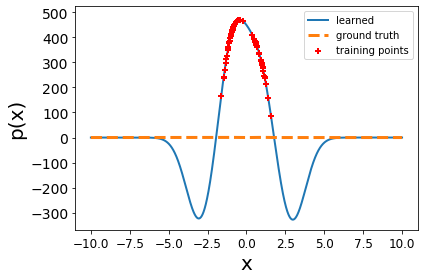

In [13]:
c,r,ntest = 0,10,100000
xtest = torch.linspace(c-r,c+r,ntest)

ytest = model.predict(xtest)
#print(ytest.sum()*(2*r)**d/ntest)
ydata_set = model.predict(data_set)
ytestref = density_fun(xtest)

fig = plt.figure()
plt.plot(xtest,ytest,lw = 2,label='learned',zorder = -1)
plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
plt.scatter(data_set,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
#fig.savefig('linearPlot0density.pdf' , format='pdf', dpi=1000)
plt.show()

# Our model

In [18]:
#Model

In [19]:
model = utils.QuadraticEstimator

In [20]:
#Data set 

In [21]:
X = data_set 

In [22]:
#Last version : 

In [23]:
last_version = utils_train.find_last_version(save_path,model = model,extension='pickle')
print(f'Last version to date : {last_version}')

Last version to date : 1


In [25]:
fixed_params = {
            'Niter' : 'auto',
            'mu_base' : mu_base,
            'eta_base' : eta_base,
            #'mu' : 1e-5
            'la' : 0
           }
variable_params = {
    'sigma' : ['uniform',0.4],
    'la' : ['loguniform',1e-2,1e2],
    'mu' : ['loguniform',1e-2,1e0]
}

cv = 5
prune = True
n_trials =  2


n_jobs = 2
eta = 0



sigma = 0.30163090881240795, lambda = 92.2733350296323, mu = 0.3021737099839062sigma = 0.5713917996141722, lambda = 0.13364198635150007, mu = 0.1989999644544983

Finished after 31 iterations
Integral tracker values : 31,12


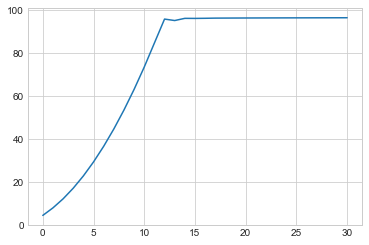

integral = 1.0000660833556587
renorm size 6.419093818105075e-11
sigma = 0.30163090881240795, lambda = 92.2733350296323, mu = 0.3021737099839062
Finished after 31 iterations
Integral tracker values : 31,12


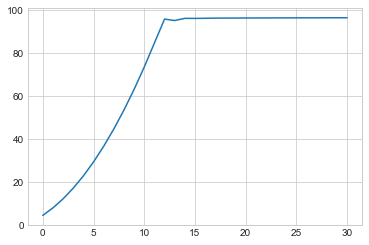

integral = 1.0000658711951262
renorm size 6.440311321163279e-11
sigma = 0.30163090881240795, lambda = 92.2733350296323, mu = 0.3021737099839062
Finished after 31 iterations
Integral tracker values : 31,12


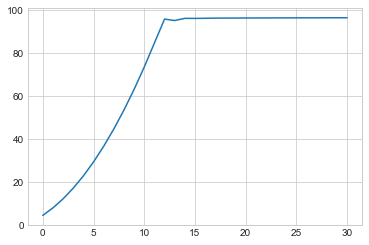

integral = 1.0000659253083355
renorm size 6.43489944798479e-11
sigma = 0.30163090881240795, lambda = 92.2733350296323, mu = 0.3021737099839062
Finished after 31 iterations
Integral tracker values : 31,12


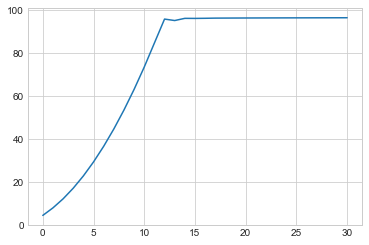

integral = 1.0000662913415406
renorm size 6.398409387277615e-11
sigma = 0.30163090881240795, lambda = 92.2733350296323, mu = 0.3021737099839062
Finished after 31 iterations
Integral tracker values : 31,12


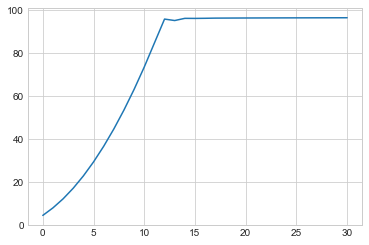

integral = 1.0000656417891878
renorm size 6.463397947028205e-11
servelastsplit
13.866261799930877
[13.96972632 13.89782837 13.78239723 13.97306941 13.70828767]
endservelastsplit
here we are 
13.866261799930877
[13.96972632 13.89782837 13.78239723 13.97306941 13.70828767]
Finished after 200 iterations
Integral tracker values : 200,193


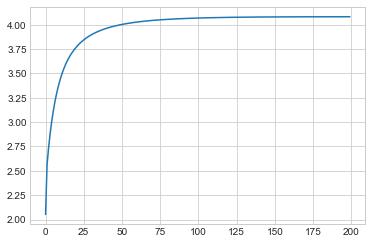

integral = 1.0001414111764253
renorm size 2.2471083118671096e-10
sigma = 0.5713917996141722, lambda = 0.13364198635150007, mu = 0.1989999644544983
Finished after 195 iterations
Integral tracker values : 195,188


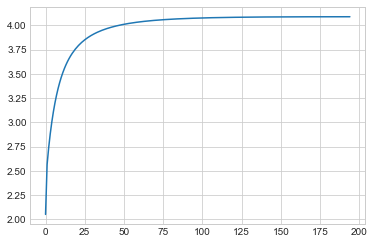

integral = 0.9999980325763187
renorm size 2.2575317438491855e-10
sigma = 0.5713917996141722, lambda = 0.13364198635150007, mu = 0.1989999644544983
Finished after 200 iterations
Integral tracker values : 200,193


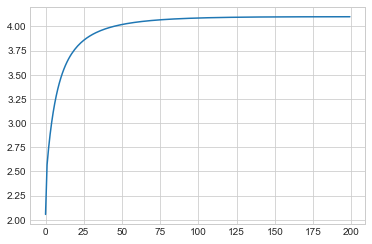

integral = 1.0001447819962068
renorm size 2.2611008471447992e-10
sigma = 0.5713917996141722, lambda = 0.13364198635150007, mu = 0.1989999644544983
Finished after 204 iterations
Integral tracker values : 204,197


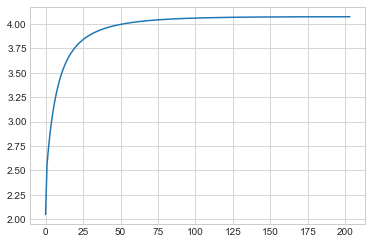

integral = 1.0000716276916841
renorm size 2.243291800723508e-10
sigma = 0.5713917996141722, lambda = 0.13364198635150007, mu = 0.1989999644544983
Finished after 200 iterations
Integral tracker values : 200,193


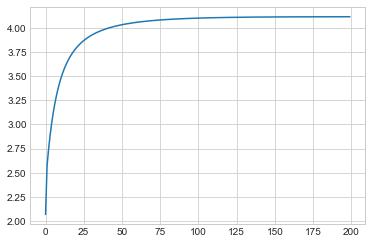

integral = 1.000039425002916
renorm size 2.259654131448052e-10
servelastsplit
6.505258360109217
[6.54730756 6.54894218 6.46378212 6.5852274  6.38103254]
endservelastsplit
here we are 
6.505258360109217
[6.54730756 6.54894218 6.46378212 6.5852274  6.38103254]


In [16]:
r = utils_train.perform_study(model, X,fixed_params = fixed_params, variable_params = variable_params ,cv= cv, prune = prune,
                  n_trials = n_trials,save_path = save_path,version = None,eta = 0,n_jobs = n_jobs)

In [118]:
version = 8
df,best_params,aux = utils_train.get_results(save_path,model = model,version = version)
display(df)

,number,value,datetime_start,datetime_complete,duration,params_la,params_mu,params_sigma,user_attrs_accuracy,user_attrs_scores,user_attrs_std,state
0,0,4.893637,2020-10-19 13:36:35.538329,2020-10-19 13:45:26.851725,00:08:51.313396,0.984609,0.000059,0.622589,4.893637,"[5.100745851949681, 4.88143214330884, 4.918755...",0.120128,COMPLETE
1,1,5.025800,2020-10-19 13:45:26.853344,2020-10-19 13:47:15.838015,00:01:48.984671,0.082886,0.003644,0.753215,5.025800,"[5.281222555223426, 5.014639068600506, 5.07701...",0.156875,COMPLETE
2,2,8.349476,2020-10-19 13:47:15.839694,2020-10-19 13:53:41.876838,00:06:26.037144,13.452389,0.000010,0.316493,8.515748,"[8.814750665116275, 8.21674531139082]",0.299003,COMPLETE
3,3,3.462951,2020-10-19 13:53:41.878452,2020-10-19 13:59:44.430739,00:06:02.552287,0.065833,0.000306,0.600902,3.462951,"[3.8530505697319755, 3.44788308334756, 3.54763...",0.244615,COMPLETE
4,4,8.020759,2020-10-19 13:59:44.432511,2020-10-19 14:00:39.287811,00:00:54.855300,1.790145,0.000022,0.659264,8.455076,"[8.261624124824008, 8.648528343516512]",0.193452,COMPLETE
5,5,4.742134,2020-10-19 14:00:39.289568,2020-10-19 14:03:12.082036,00:02:32.792468,85.320145,0.000086,0.477759,4.998917,"[5.087818721471465, 4.910015090815091]",0.088902,COMPLETE
6,6,5.884074,2020-10-19 14:03:12.083579,2020-10-19 14:07:45.167464,00:04:33.083885,9.551923,0.000027,0.396038,6.202692,"[6.368555926641209, 6.036827203463445]",0.165864,COMPLETE
7,7,5.726362,2020-10-19 14:07:45.169024,2020-10-19 14:07:52.144579,00:00:06.975555,3.034349,0.724380,0.692730,6.036439,"[6.105443173493293, 5.967435806791587]",0.069004,COMPLETE
8,8,4.430016,2020-10-19 14:07:52.146415,2020-10-19 14:07:56.317578,00:00:04.171163,13.577953,0.037186,0.486300,4.669898,"[4.780313761722576, 4.559481371209596]",0.110416,COMPLETE
9,9,4.735088,2020-10-19 14:07:56.319193,2020-10-19 14:08:40.492382,00:00:44.173189,0.121089,0.080128,0.331627,4.991489,"[5.417433288601187, 4.565543854053286]",0.425945,COMPLETE


In [117]:
eta = 0
params = aux(eta)
print(params)

{'sigma': 0.6, 'la': 0.5113643242487619, 'mu': 0.04058219645680331, 'Niter': 'auto', 'mu_base': tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'eta_base': 5}


In [26]:
params = fixed_params
params['sigma'] = 0.45
params['la'] = 0.02
params['mu'] = 3e-5
params['Niter'] = 'auto'

In [27]:
clf = model(**params)
clf.fit(X)

sigma = 0.45, lambda = 0.02, mu = 3e-05
Integral tracker values : 2824,75


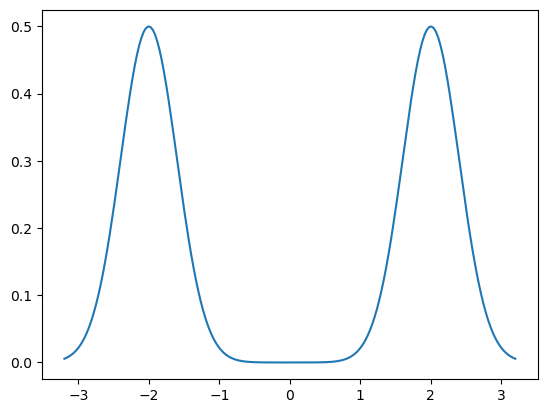

integral = 1.0010126611227887
renorm size 4.395899672326567e-11
integral = 1.0009901638432637
renorm size 4.395899672326567e-11
tensor(0)
tensor(165167.2184)
integral = 1.0009968151549102
renorm size 4.395899672326567e-11


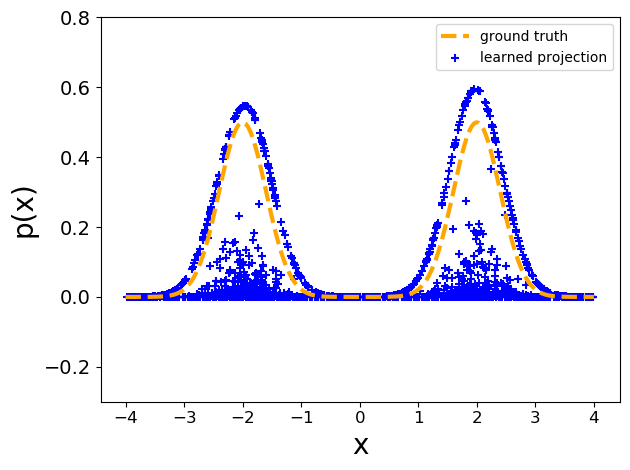

In [28]:
#xtest = torch.linspace(-,5,3000)
c,rad,ntest = 0,4,1000
rad2 = 2


xtest2 = gentest(ntest,c,rad)
xtest = torch.zeros((ntest//2,d))


xtest[:,0] = c + rad*(2*torch.rand(ntest//2) - 1)
#xtest[:,1:] = c + rad2*(2*torch.rand((ntest//2,d-1)) - 1)

ytest = clf.predict(xtest)
ytest2 = clf.predict(xtest2)
print((ytest < 0).sum())
print(ytest.sum()*(2*rad)*(2*rad2)**(d-1)/ntest)
ydata_set = clf.predict(data_set)



xdata = data_set


xhaha = torch.linspace(-rad,rad,200)
yhaha = 0.5*(torch.exp(-(xhaha-r_data)**2/(2*sigma_data**2)) +torch.exp(-(xhaha+r_data)**2/(2*sigma_data**2)) )




#xtest = torch.load(pt_path+'xtest_linear0.pt')
#ytest = torch.load(pt_path+'ytest_linear0.pt')
#xdata = torch.load(pt_path+'xdataExperiments.pt')
#ydata_set = torch.load(pt_path+'ydata_linear0.pt')


#ytestref = density_fun(xtest)



fig = plt.figure()
plt.scatter(xtest[:,0],ytest[:],lw = 1.5,label='learned projection',zorder = -1,marker = '+',color = 'b')
plt.scatter(xtest2[:,0],ytest2[:],lw = 1.5,zorder = -1,marker = '+',color = 'b')
plt.plot(xhaha,yhaha,lw = 3,linestyle = 'dashed',label = 'ground truth',color = 'orange')
#plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
#plt.scatter(xdata,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.ylim(-0.3,0.8)
plt.tight_layout()
fig.savefig('ourPlot0densityIMPORTANT.pdf' , format='pdf', dpi=100)
plt.show()

# Nadaraya Watson

In [6]:
#Model

In [7]:
model = utils.NadarayaWatsonEstimator

In [8]:
#Data set 

In [9]:
X = data_set 

In [16]:
#Last version : 

In [17]:
last_version = utils_train.find_last_version(save_path,model = model,extension='pickle')
print(f'Last version to date : {last_version}')

Last version to date : 0


In [18]:
fixed_params = {
            'Niter' : 'auto',
            'mu_base' : mu_base,
            'eta_base' : eta_base
           }
variable_params = {
    'sigma' : ['uniform',0.2,0.8],
    'la' : ['loguniform',1e-7,1e0]
}


cv = 5
prune = False
n_trials =  30


n_jobs = -1
eta = 0



In [31]:
r = utils_train.perform_study(model, X,fixed_params = fixed_params, variable_params = variable_params ,cv= cv, prune = prune,
                  n_trials = n_trials,save_path = save_path+'_option3',version = None,eta = 0,n_jobs = n_jobs)

[W 2020-10-20 11:39:35,971] Trial 0 failed because of the following error: IndexError('list index out of range',)
Traceback (most recent call last):
  File "/opt/miniconda3/envs/p36/lib/python3.6/site-packages/optuna/study.py", line 799, in _run_trial
    result = func(trial)
  File "/Users/ulyssemarteau/Desktop/NIPS/Experiments/npm_nnf/npm_nnf/utils/utils_train.py", line 385, in objective
    param[key] = trial.suggest_uniform(key,val[1],val[2])
IndexError: list index out of range
[W 2020-10-20 11:39:35,973] Trial 1 failed because of the following error: IndexError('list index out of range',)
Traceback (most recent call last):
  File "/opt/miniconda3/envs/p36/lib/python3.6/site-packages/optuna/study.py", line 799, in _run_trial
    result = func(trial)
  File "/Users/ulyssemarteau/Desktop/NIPS/Experiments/npm_nnf/npm_nnf/utils/utils_train.py", line 385, in objective
    param[key] = trial.suggest_uniform(key,val[1],val[2])
IndexError: list index out of range


IndexError: list index out of range

In [10]:
df,best_params,aux = utils_train.get_results(save_path+'_option3',model = model,version = None)
display(df)

,number,value,datetime_start,datetime_complete,duration,params_la,params_sigma,user_attrs_accuracy,user_attrs_scores,user_attrs_std,state
0,0,7.767805,2020-10-20 07:22:15.500700,2020-10-20 07:28:18.154848,00:06:02.654148,6.939140e-01,0.494828,7.767805,"[7.640518118033885, 7.795121476388436, 7.85109...",0.069433,COMPLETE
1,1,7.263179,2020-10-20 07:22:15.501809,2020-10-20 07:58:21.121545,00:36:05.619736,2.412797e-04,0.606461,7.263179,"[7.141955920883879, 7.294515450762558, 7.39015...",0.084283,COMPLETE
2,2,5.978488,2020-10-20 07:22:15.502252,2020-10-20 08:25:57.573430,01:03:42.071178,3.889288e-06,0.399465,5.978488,"[5.754502017237165, 6.044243308686326, 6.22301...",0.155691,COMPLETE
3,3,6.278518,2020-10-20 07:22:15.503701,2020-10-20 07:55:29.862517,00:33:14.358816,9.446431e-07,0.278711,6.278518,"[5.965772234023848, 6.336114050250669, 6.54410...",0.189376,COMPLETE
4,4,6.083390,2020-10-20 07:22:15.504153,2020-10-20 08:10:26.712106,00:48:11.207953,5.738016e-03,0.397471,6.083390,"[5.861396519456843, 6.152493011814151, 6.30198...",0.146658,COMPLETE
5,5,7.325984,2020-10-20 07:22:15.505375,2020-10-20 07:59:35.271077,00:37:19.765702,1.940741e-06,0.613683,7.325984,"[7.203100003865256, 7.358198092911607, 7.45427...",0.085238,COMPLETE
6,6,10.283093,2020-10-20 07:22:15.505913,2020-10-20 07:25:09.654420,00:02:54.148507,9.765146e-01,0.778272,10.283093,"[10.233374242887487, 10.300907838679175, 10.33...",0.032538,COMPLETE
7,7,8.870665,2020-10-20 07:22:15.506879,2020-10-20 08:09:07.613809,00:46:52.106930,3.167317e-04,0.787357,8.870665,"[8.789453221132193, 8.890575316808336, 8.95353...",0.055553,COMPLETE
8,8,6.141105,2020-10-20 07:25:09.655802,2020-10-20 08:49:47.158464,01:24:37.502662,2.560637e-06,0.318540,6.141105,"[5.902102640110746, 6.198068074532378, 6.38360...",0.158234,COMPLETE
9,9,6.300883,2020-10-20 07:28:18.156469,2020-10-20 08:06:55.009840,00:38:36.853371,1.153644e-05,0.484561,6.300883,"[6.135881591528329, 6.342323577809875, 6.48580...",0.117657,COMPLETE


In [11]:
eta = 0
params = aux(0)
print(params)

{'sigma': 0.3994649170902642, 'la': 3.889288114537172e-06, 'Niter': 'auto', 'mu_base': tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'eta_base': 5}


In [12]:
clf = model(**params)
clf.fit(X)

sigma = 0.3994649170902642, lambda = 3.889288114537172e-06
 norm of the constraint : 2.9075560310518394e-10
Finished after 11270 iterations


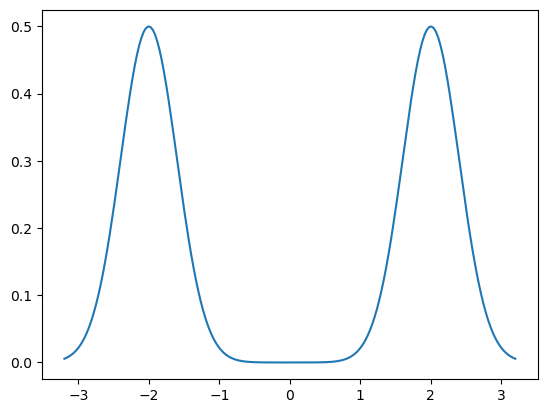

integral = tensor([[1.0000]])
integral = tensor([[1.0000]])
tensor(0)
tensor(7.8699e+08)
integral = tensor([[1.0000]])


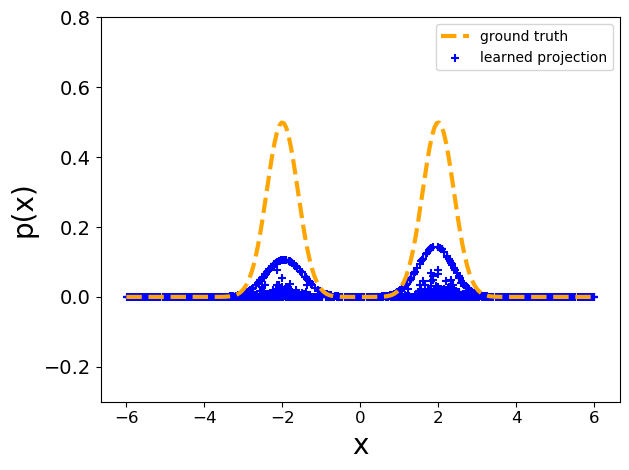

In [14]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
#xtest = torch.linspace(-,5,3000)
c,rad,ntest = 0,6,1000

xtest2 = gentest(ntest,c,rad)
xtest = torch.zeros((ntest//2,d))


xtest[:,0] = c + rad*(2*torch.rand(ntest//2) - 1)
ytest = clf.predict(xtest)
ytest2 = clf.predict(xtest2)
print((ytest < 0).sum())
print(ytest.sum()*(2*rad)**d/ntest)
ydata_set = clf.predict(data_set)



xdata = data_set


xhaha = torch.linspace(-rad,rad,200)
yhaha = 0.5*(torch.exp(-(xhaha-r_data)**2/(2*sigma_data**2)) +torch.exp(-(xhaha+r_data)**2/(2*(sigma_data)**2)) )
#yhaha = density_data(xhaha)



#xtest = torch.load(pt_path+'xtest_linear0.pt')
#ytest = torch.load(pt_path+'ytest_linear0.pt')
#xdata = torch.load(pt_path+'xdataExperiments.pt')
#ydata_set = torch.load(pt_path+'ydata_linear0.pt')


#ytestref = density_fun(xtest)



fig = plt.figure()
plt.scatter(xtest[:,0],ytest[:],lw = 1.5,label='learned projection',zorder = -1,marker = '+',color = 'b')
plt.scatter(xtest2[:,0],ytest2[:],lw = 1.5,zorder = -1,marker = '+',color = 'b')
plt.plot(xhaha,yhaha,lw = 3,linestyle = 'dashed',label = 'ground truth',color = 'orange')
#plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
#plt.scatter(xdata,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.ylim(-0.3,0.8)
plt.tight_layout()
fig.savefig('NW0densityIMPORTANT.pdf' , format='pdf', dpi=100)
plt.show()

# GLMS 

In [ ]:
version = find_last_version(path = 'models/glm_model_1D',extension = 'pickle')

print(f'last version number : {version}')

In [ ]:
parameters = {'sigma' : [1], 'la' : np.logspace(-8,0,20),'Niter' : ['auto'],'mu_base' : [mu_base],'eta_base' : [eta_base]}
X = data_set
model = utils.ExpoEstimator()
clf = GridSearchCV(model, parameters,cv = 5)
clf.fit(X)
clf_info = {'cross_valid' : clf.cv_results_,'data_set' : data_set}
version = 1
filename = f'models/glm_model_1D_{version}.pickle'
pickle.dump(clf_info, open(filename, 'wb'))

In [ ]:
version = 1
filename = f'models/glm_model_1D_{version}.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
df = pd.DataFrame(loaded_model['cross_valid'])
data_set = loaded_model['data_set']
params_best = df[df['rank_test_score'] == 1].iloc[0]['params']
print(params_best)
model = utils.ExpoEstimator(**params_best)
model.fit(data_set)

In [ ]:
c,r,ntest = 0,10,100000
xtest = torch.linspace(c-r,c+r,ntest)

ytest = model.predict(xtest)
#print(ytest.sum()*(2*r)**d/ntest)
ydata_set = model.predict(data_set)
ytestref = density_fun(xtest)

fig = plt.figure()
plt.plot(xtest,ytest,lw = 2,label='learned',zorder = -1)
plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
plt.scatter(data_set,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
plt.legend()
plt.xlabel("x",fontsize = 20)
plt.ylabel("p(x)",fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
#fig.savefig('linearPlot0density.pdf' , format='pdf', dpi=1000)
plt.show()